Matplotlib is building the font cache; this may take a moment.


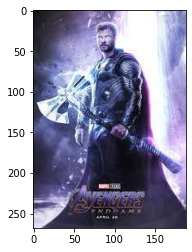

In [5]:
# 1. Read a jpeg image and print the image file

from PIL import Image
  
img = Image.open('Thor.jpg')

import matplotlib.pyplot as plt

plt.imshow(img)

In [13]:
# 2. Merge two pdf files using python script

import PyPDF2
 
 
def PDFmerge(pdfs, output):

    pdfMerger = PyPDF2.PdfFileMerger()
 
    for pdf in pdfs:
        pdfMerger.append(pdf)
 
    with open(output, 'wb') as f:
        pdfMerger.write(f)
 
 
def main():
    
    pdfs = ['Thor.pdf', 'Loki.pdf']
 
    output = 'combined_example.pdf'
 
    PDFmerge(pdfs=pdfs, output=output)
 
 
if __name__ == "__main__":
    main()

In [15]:
# 3. Scrape a website and store the data into DB.

import requests
import MySQLdb
from bs4 import BeautifulSoup

In [16]:
import mysql.connector
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password=""

)

In [18]:
mydb = mysql.connector.connect(
  host="localhost",
 user="root",
  password="",
  database="sakila"
)
dbse = mydb.cursor()

In [19]:
url_to_scrape = 'https://howpcrules.com/sample-page-for-web-scraping/'
plain_html_text = requests.get(url_to_scrape)
soup = BeautifulSoup(plain_html_text.text, "html.parser")

In [20]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="A developer's guide on code and beyond" name="description"/>
  <!-- Mobile Specific Meta -->
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <title>
   Sample Page for Web Scraping – How PC Rules my Life
  </title>
  <link href="//fonts.googleapis.com" rel="dns-prefetch"/>
  <link href="//maxcdn.bootstrapcdn.com" rel="dns-prefetch"/>
  <link href="//s.w.org" rel="dns-prefetch"/>
  <link href="https://howpcrules.com/feed/" rel="alternate" title="How PC Rules my Life » Feed" type="application/rss+xml"/>
  <link href="https://howpcrules.com/comments/feed/" rel="alternate" title="How PC Rules my Life » Comments Feed" type="application/rss+xml"/>
  <script type="text/javascript">
   window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/12.0.0-1\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/12.0.0-1\/svg\/","svgEx

In [23]:
basic_data_table = soup.find("table", {"summary": "Basic data for the event"});
basic_data_cells = basic_data_table.findAll('td')

In [29]:
type_of_course = basic_data_cells[0].text.strip()
lecturer = basic_data_cells[1].text.strip()
number = basic_data_cells[2].text.strip()
short_text = basic_data_cells[3].text.strip()
choice_term = basic_data_cells[4].text.strip()
hours_per_week_in_term = basic_data_cells[5].text.strip()
expected_num_of_participants = basic_data_cells[6].text.strip()
maximum_participants = basic_data_cells[7].text.strip()
assignment = basic_data_cells[8].text.strip()
lecture_id = basic_data_cells[9].text.strip()
credit_points = basic_data_cells[10].text.strip()
hyperlink = basic_data_cells[11].text.strip()
language = basic_data_cells[12].text.strip()
db = MySQLdb.connect("localhost", "root", "", "Sakila")
# prepare a cursor object using cursor() method
cursor = db.cursor()
# Prepare SQL query to INSERT a record into the database.
sql = "INSERT INTO classes(name_of_class, type_of_course, lecturer, number, short_text, choice_term, hours_per_week_in_term, expected_num_of_participants, maximum_participants, assignment, lecture_id, credit_points, hyperlink, language, created_at) VALUES ('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', {})".format(name_of_class, type_of_course, lecturer, number, short_text, choice_term, hours_per_week_in_term, expected_num_of_participants, maximum_participants, assignment, lecture_id, credit_points, hyperlink, language, 'NOW()')
try:
 # Execute the SQL command
 cursor.execute(sql)
 # Commit your changes in the database
 db.commit()
except:
 # Rollback in case there is any error
 db.rollback()
 #get the just inserted class id
sql = "SELECT LAST_INSERT_ID()"
try:
 # Execute the SQL command
 cursor.execute(sql)
 # Get the result
 result = cursor.fetchone()
 # Set the class id to the just inserted class
 class_id = result[0]
except:
 # Rollback in case there is any error
 db.rollback()
 # disconnect from server
 db.close()
 # on error set the class_id to -1
 class_id = -1
dates_tables = soup.find_all("table", {"summary": "Overview of all event dates"});

In [30]:
#Iterate through the tables
for table in dates_tables:
 #Iterate through the rows inside the table
 for row in table.select("tr"):
  #Get all cells inside the row
  cells = row.findAll("td")
  #check if there is at least one td cell inside this row
  if(len(cells) > 0):
   #get all the different data from the table's tds
   #Split this cell into two different parts seperated by 'to' in order to have a start_date and an end_date.
   duration = cells[0].text.split("to")
   start_date = duration[0].strip()
   end_date = duration[1].strip()
   day = cells[1].text.strip()
   #Split this cell into two different parts seperated by 'to' in order to have a start_time and an end_time.
   time = cells[2].text.split("to")
   start_time = time[0].strip()
   end_time = time[1].strip()
   frequency = cells[3].text.strip()
   room = cells[4].text.strip()
   lecturer_for_date = cells[5].text.strip()
   status = cells[6].text.strip()
   remarks = cells[7].text.strip()
   cancelled_on = cells[8].text.strip()
   max_participants = cells[9].text.strip()
#Save event data to database
# Open database connection
db = MySQLdb.connect("localhost", "root", "", "Sakila")
# prepare a cursor object using cursor() method
cursor = db.cursor()
# Prepare SQL query to INSERT a record into the database.
sql = "INSERT INTO events(class_id, start_date, end_date, day, start_time, end_time, frequency, room, lecturer_for_date, status, remarks, cancelled_on, max_participants, created_at) VALUES ('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', {})".format(class_id, start_date, end_date, day, start_time, end_time, frequency, room, lecturer_for_date, status, remarks, cancelled_on, max_participants, 'NOW()')
try:
 # Execute the SQL command
 cursor.execute(sql)
 # Commit your changes in the database
 db.commit()
except:
 # Rollback in case there is any error
 db.rollback()
 # disconnect from server
 db.close()

In [32]:
# 4. Write queries to filter the data in db

dbse = mydb.cursor()
dbse = mydb.cursor()

dbse.execute("SHOW TABLES")

for value in dbse:
  print(value)

('actor',)
('actor_info',)
('address',)
('category',)
('city',)
('classes',)
('country',)
('customer',)
('customer_list',)
('events',)
('film',)
('film_actor',)
('film_category',)
('film_list',)
('film_text',)
('inventory',)
('language',)
('nicer_but_slower_film_list',)
('payment',)
('rental',)
('sales_by_film_category',)
('sales_by_store',)
('staff',)
('staff_list',)
('store',)
